# Assignment 2

by YaoMin(Allen) Zhang

## Goals
1. To develop your version K-Means using the algorithm specified below. (This has been an interview question for jobs using machine learning.)
2. To compare the performance of different implementations.
3. To demonstrate your understanding of clustering algorithms like K-Means, DBSCAN and Hierarchical. (This will also start introducing you to skills needed for data challenges.)
4. To extend the functionality of the developed K-Means implementation through additional parameters. (This shows your ability to develop novel or custom algorithms.)



## Step 1: Develop K-Means

I use np.random.seed() function to generate random indexes to get centroids. I tried several numbers and chose 6 as the seed number to make sure the random number is the same as the example in the assignment.

## Step 2: Performance Comparison

## Prepare Data
To generate 700 instances of data points in 2-dimensional space, with each of the instances belonging to one of 4 clusters. The coordinates for the instances are returned as X.
The cluster assignments are returned as cluster_assignments.

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans as SKLearnKMeans
import matplotlib.pyplot as plt
import numpy as np

In [3]:

# Generate data
X, cluster_assignments = make_blobs(n_samples=700, centers=4,
cluster_std=0.60 , random_state=0)

In [4]:
X

array([[-0.84177847,  7.86655225],
       [-1.21515296,  8.01484649],
       [ 1.84320847, -0.07222085],
       ...,
       [-1.83141457,  2.2867542 ],
       [-1.84639796,  3.30491543],
       [ 0.28256062,  4.77250619]])

In [5]:
cluster_assignments

array([3, 3, 1, 3, 1, 3, 1, 1, 1, 3, 0, 1, 3, 1, 2, 0, 0, 3, 1, 3, 1, 1,
       2, 1, 2, 3, 0, 2, 2, 2, 2, 0, 3, 0, 1, 3, 3, 1, 1, 0, 0, 1, 1, 2,
       1, 3, 3, 0, 3, 1, 0, 3, 0, 0, 0, 2, 1, 3, 0, 1, 2, 1, 2, 2, 3, 0,
       1, 2, 1, 1, 3, 1, 3, 3, 1, 2, 2, 0, 0, 0, 2, 2, 2, 1, 1, 3, 0, 2,
       0, 2, 3, 3, 0, 3, 3, 3, 2, 1, 3, 3, 3, 1, 2, 2, 1, 1, 1, 0, 0, 2,
       1, 0, 0, 1, 0, 0, 3, 3, 2, 2, 0, 1, 2, 3, 2, 3, 3, 2, 1, 3, 2, 3,
       2, 1, 0, 3, 3, 2, 0, 0, 2, 0, 1, 1, 2, 1, 2, 3, 2, 1, 0, 2, 0, 1,
       0, 3, 3, 1, 0, 2, 3, 0, 0, 2, 3, 3, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1,
       0, 1, 0, 0, 1, 3, 2, 3, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 3, 2, 2,
       2, 0, 1, 1, 1, 3, 0, 0, 2, 2, 1, 3, 1, 3, 2, 3, 0, 0, 0, 3, 1, 1,
       0, 3, 1, 3, 3, 2, 0, 1, 1, 0, 3, 3, 3, 3, 0, 2, 3, 1, 1, 3, 0, 3,
       3, 0, 0, 1, 1, 0, 1, 2, 2, 2, 3, 1, 2, 0, 3, 0, 3, 3, 3, 2, 0, 2,
       2, 3, 3, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 3, 0, 1, 1, 1, 0, 3, 0, 0,
       1, 3, 3, 1, 1, 2, 1, 1, 3, 0, 1, 3, 2, 0, 0,

In [6]:
# Function to visualize the clusters
import seaborn as sns

# Function to plot clusters using seaborn
# as Professor prefers seaborn ^_^
def sns_plot_clusters(X, labels, centroids, title):
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis',marker='o', s=50)
    sns.scatterplot(x=np.array(centroids)[:, 0], y=np.array(centroids)[:, 1], color='red', marker='x', s=100)
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(title='Cluster')
    plt.show()

## Step 2.1: Use X as the parameter as input to KMeans as implemented in Step 1

In [7]:
from KMeans import KMeans
# Use the custom KMeans implementation
my_kmeans = KMeans(k=4, max_iterations=100)
my_labels, my_centroids= my_kmeans.fit(X.tolist())



[[-0.21962678652099932, 7.504784076085768], [3.436515209964856, 6.164323394309651], [-2.8608118282596586, 3.7972258541657666], [-2.834231079681164, 4.411701925372036]]


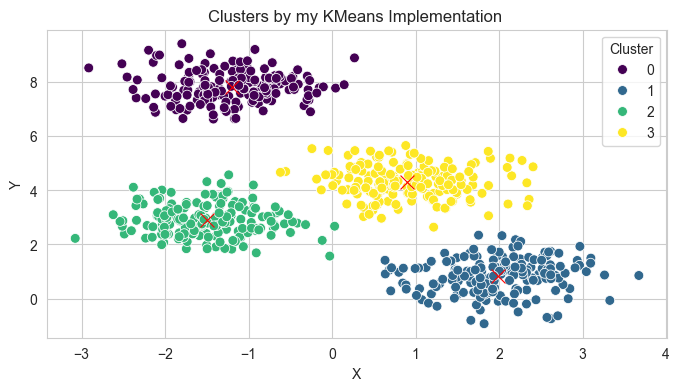

In [8]:
# Visualize the clusters for custom KMeans using seaborn
sns_plot_clusters(X, my_labels, my_centroids, "Clusters by my KMeans Implementation ")



## Step 2.2: Use X as the parameter as input to KMeans as implemented in scikit-learn


In [9]:
# Use the KMeans from scikit-learn
sklearn_kmeans = SKLearnKMeans(n_clusters=4, max_iter=100, random_state=0)
sklearn_labels = sklearn_kmeans.fit_predict(X)

/Users/mcuallen/opt/anaconda3/envs/introtoai/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


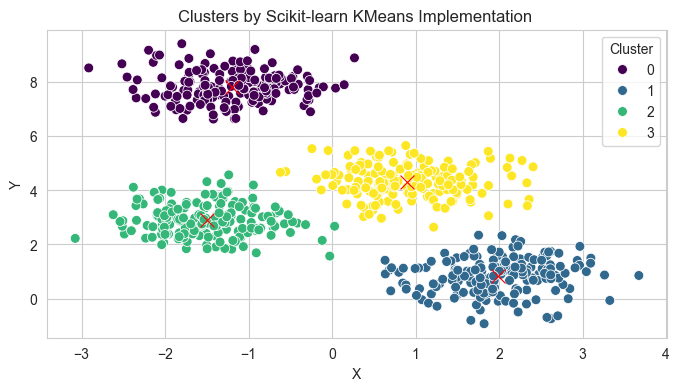

In [10]:


# Visualize the clusters for scikit-learn KMeans using seaborn
sns_plot_clusters(X, sklearn_labels, sklearn_kmeans.cluster_centers_, "Clusters by Scikit-learn KMeans Implementation ")


## Step 2.3: Performance Comparison

By referring to the [Clustering performance evaluation](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation), we can see that there are several metrics to evaluate the performance of clustering algorithms. Here I choose Adjusted Rand Index and Normalized Mutual Information to compare the performance of the two implementations. Both ARI and NMI are in the range of [0, 1], and the higher the value, the better the clustering result. Given they are both very close to 1, we can conclude that the two implementations have good performance.

In [11]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Assuming cluster_assignments are the true labels and sklearn_labels are the predicted labels
ari_score = adjusted_rand_score(cluster_assignments, sklearn_labels)
nmi_score = normalized_mutual_info_score(cluster_assignments, sklearn_labels, average_method='arithmetic')

print(f"Adjusted Rand Index: {ari_score}")
print(f"Normalized Mutual Information: {nmi_score}")



Adjusted Rand Index: 0.9961850080391301
Normalized Mutual Information: 0.9936471967946069


We can also visualize the original cluster_assignments and see the two implementations have similar results.

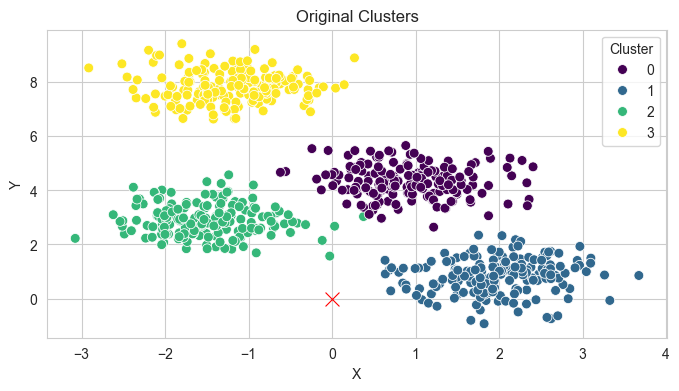

In [12]:
sns_plot_clusters(X, cluster_assignments, [[0,0]], "Original Clusters")


In [13]:
my_centroids

[[-1.2040579337244177, 7.837858432492295],
 [1.9877063026473274, 0.8318857877497887],
 [-1.4997094181421273, 2.905741940858995],
 [0.9004393234899268, 4.32217463716]]

For the output of the centroids, we can do a comparison between the two centroid sets. We can see that the two sets of centroids are very close to each other, which means the two implementations have similar results.

In [14]:
my_centroids.sort()
sklearn_centroids = sorted(sklearn_kmeans.cluster_centers_.tolist())

diff_centroids = np.array(my_centroids) - np.array(sklearn_centroids)
print(my_centroids)
print(sklearn_centroids)
diff_centroids


[[-1.4997094181421273, 2.905741940858995], [-1.2040579337244177, 7.837858432492295], [0.9004393234899268, 4.32217463716], [1.9877063026473274, 0.8318857877497887]]
[[-1.4997094181421282, 2.905741940858994], [-1.2040579337244182, 7.837858432492295], [0.9004393234899273, 4.322174637160002], [1.9877063026473274, 0.8318857877497878]]


array([[ 8.88178420e-16,  8.88178420e-16],
       [ 4.44089210e-16,  0.00000000e+00],
       [-4.44089210e-16, -1.77635684e-15],
       [ 0.00000000e+00,  8.88178420e-16]])

# Step 4: Extend K-Means Functionality

My idea is to prepare k slots, and then assign each point to the closest centroid(slot), similar idea as Round Robin
After n iterations, we will fill the k slots. Then we can assign the label to each point based on the slot it is in.

the main idea is as follows:
```python
        n = len(X)
        visited = set()
        slots = [[] for _ in range(self.k)] #  each list contains the indices of the points in the cluster
        labels = [0] * len(X)
        for i in range(n):
            cur_centroiids = self.centroids[i % self.k]
            distances = []
            for j in range(n):
                if j in visited:
                    distances.append(float('inf'))
                else:
                    distances.append(np.linalg.norm(np.array(X[j]) - np.array(cur_centroiids)))
            min_index = distances.index(min(distances))
            visited.add(min_index)
            slots[i % self.k].append(min_index)

        #print(slots)
        for i in range(self.k):
            for idx in slots[i]:
                labels[idx] = i
```
